In [1]:
import json
import os 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

In [2]:
def get_results(train=True):
    global filenames
    filenames = sorted([f for f in os.listdir(os.getcwd()+'./results/') if not f.endswith('checkpoints')])
    for filename in filenames:
        if train:
            with open('./results/'+ filename,'r') as f: yield filename, json.load(f)
        else:
            try:
                with open('./results_test/'+ filename,'r') as f: yield filename, json.load(f)
            except:
                pass

In [3]:
def mk_dataframe(results_train, results_test=None):
    filename_train, results_train = results_train
    if results_test != None:
        filename_test, results_test = results_test
        assert filename_train==filename_test, 'filenames should be the same'
        #del results_test['dev']['lf_acc']
        #del results_test['test']['lf_acc']
        #del results_test['dev']['ex_acc']
        #del results_test['test']['ex_acc']
        results_test.update(results_train)
        print("Model: ", filename_test.strip('.json'))
        return pd.DataFrame.from_dict(results_test, orient='index').fillna('_')
    else:
        print("Model: ", filename_train.strip('.json'))
        return pd.DataFrame.from_dict(results_train, orient='index')

In [4]:
def show_plots(metric, idx):
    folder = 'losses/' if metric == 'loss' else 'accs/'
    filename = './plots/' + folder + os.listdir(os.getcwd() + './plots/' + folder)[idx]  
    print("Model: ", re.sub(r'./plots/' + folder, '', filename.replace('.png', '')))
    image = img.imread(filename)
    plt.clf()
    plt.figure(dpi=100)
    plt.imshow(image)
    plt.show()

In [5]:
results_train = get_results()
results_test = get_results(train=False)

In [6]:
mk_dataframe(next(iter(results_train)))

Model:  100d_bert_avg_pos_types_homogeneous_kg


,max,agg,sel,where
dev,0.543366,0.902141,0.886829,0.660964
train,0.905622,0.993923,0.999428,0.909304


In [7]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_bert_avg_pos_types_single_kg


,max,agg,sel,where,lf_acc,ex_acc
dev,0.54863,0.898792,0.873430,0.678789,_,_
test,_,0.897213,0.863331,0.572324,0.470678,0.566181
train,0.968558,0.988703,0.999124,0.973063,_,_


In [8]:
mk_dataframe(next(iter(results_train)))

Model:  100d_bert_avg_types_homogeneous_kg


,max,agg,sel,where
dev,0.535830,0.901304,0.884556,0.651633
train,0.913522,0.997730,0.999464,0.916025


In [9]:
mk_dataframe(next(iter(results_train)))

Model:  100d_bert_avg_types_mixed_kg


,max,agg,sel,where
dev,0.631774,0.902381,0.936117,0.743271
train,0.914452,0.998445,0.999464,0.910930


In [10]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_bert_avg_types_single_kg


,max,agg,sel,where,lf_acc,ex_acc
dev,0.545161,0.900108,0.865654,0.679986,_,_
test,_,0.898797,0.853325,0.669854,0.545092,0.616719
train,0.956636,0.984717,0.998945,0.972384,_,_


In [11]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_bert_max-pool_pos_types_single_kg


,max,agg,sel,where,lf_acc,ex_acc
dev,0.548152,0.899629,0.877019,0.678430,_,_
test,_,0.897657,0.861875,0.553515,0.456745,0.564471
train,0.963178,0.987649,0.999142,0.973134,_,_


In [12]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_bert_max-pool_types_single_kg


,max,agg,sel,where,lf_acc,ex_acc
dev,0.536428,0.899270,0.868046,0.673286,_,_
test,_,0.898417,0.854908,0.666751,0.546105,0.619569
train,0.959514,0.990151,0.999035,0.969953,_,_


In [13]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_pos_types_single_kg


,max,agg,sel,where,lf_acc,ex_acc
dev,0.6519,0.899406,0.931235,0.779929,_,_
test,_,0.898218,0.913964,0.334635,0.282673,0.428292
train,0.968804,0.988271,0.998758,0.979771,_,_


In [14]:
mk_dataframe(next(iter(results_train)))

Model:  100d_types_homogeneous_kg


,max,agg,sel,where
dev,0.638361,0.901188,0.941330,0.749644
train,0.911541,0.995688,0.999468,0.910033


In [15]:
mk_dataframe(next(iter(results_train)), next(iter(results_test)))

Model:  100d_types_single_kg


,max,agg,sel,where,lf_acc,ex_acc
dev,0.6481,0.896437,0.926247,0.777316,_,_
test,_,0.897273,0.912074,0.766644,0.648233,0.713485
train,0.962487,0.983036,0.998651,0.978919,_,_


Model:  100d_bert_avg_pos_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

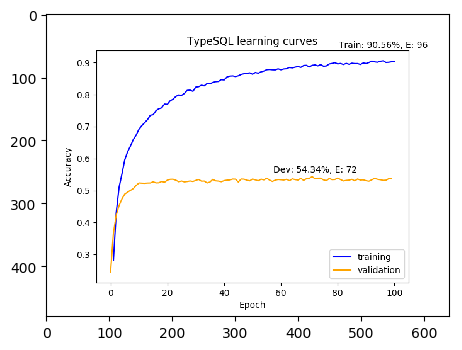

Model:  100d_bert_avg_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

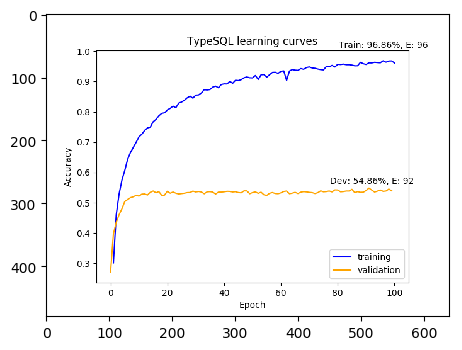

Model:  100d_bert_avg_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

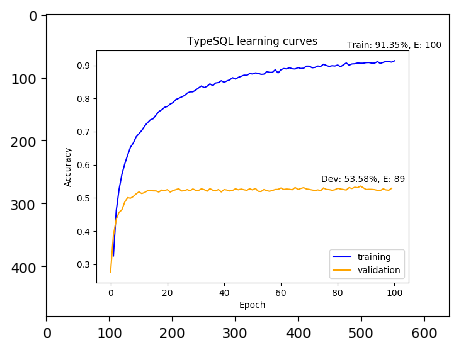

Model:  100d_bert_avg_types_mixed_kg


<Figure size 432x288 with 0 Axes>

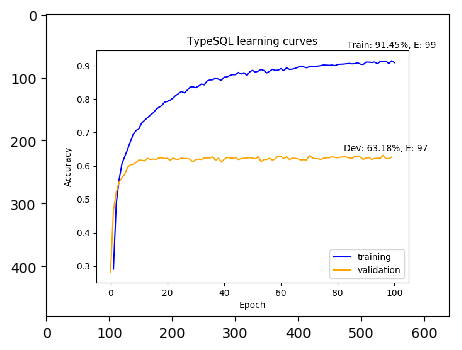

Model:  100d_bert_avg_types_single_kg


<Figure size 432x288 with 0 Axes>

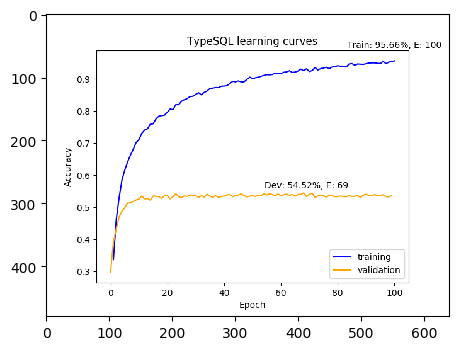

Model:  100d_bert_max-pool_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

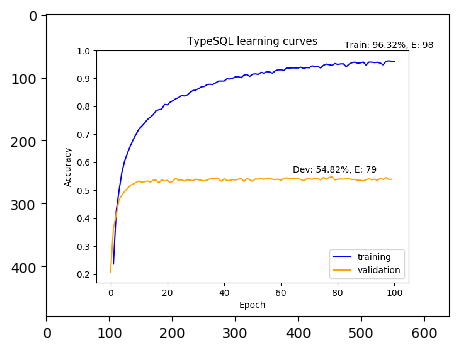

Model:  100d_bert_max-pool_types_single_kg


<Figure size 432x288 with 0 Axes>

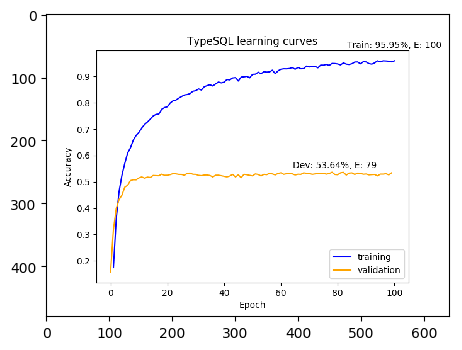

Model:  100d_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

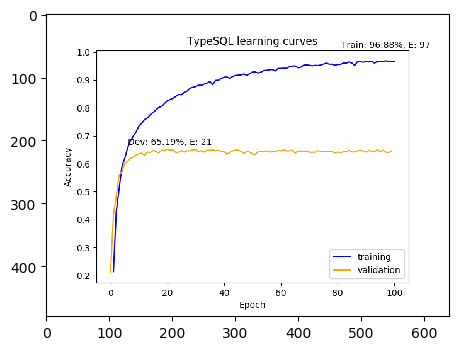

Model:  100d_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

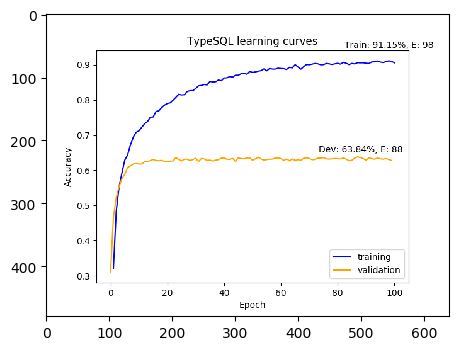

Model:  100d_types_single_kg


<Figure size 432x288 with 0 Axes>

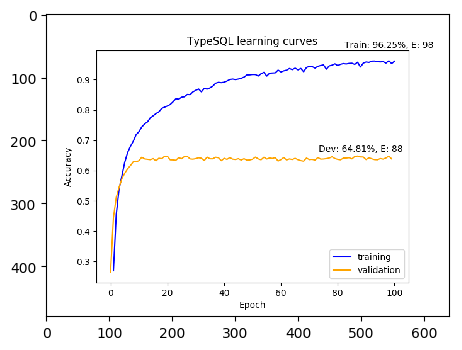

In [16]:
for i in range(len(filenames)):
    show_plots('acc', i)

Model:  100d_bert_avg_pos_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

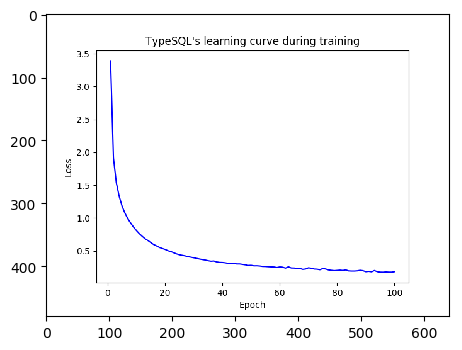

Model:  100d_bert_avg_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

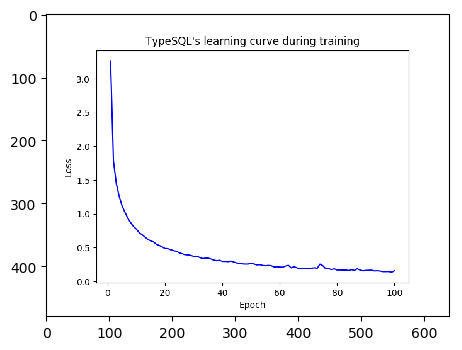

Model:  100d_bert_avg_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

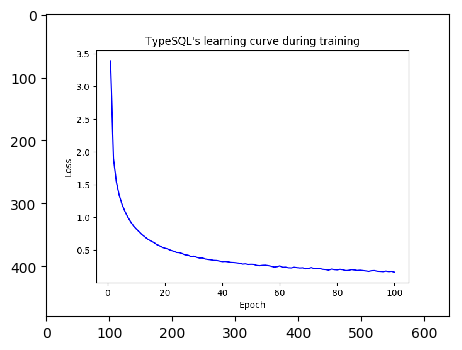

Model:  100d_bert_avg_types_mixed_kg


<Figure size 432x288 with 0 Axes>

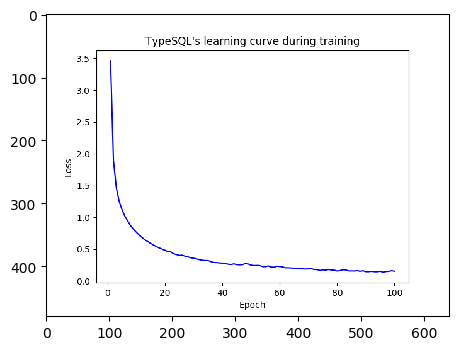

Model:  100d_bert_avg_types_single_kg


<Figure size 432x288 with 0 Axes>

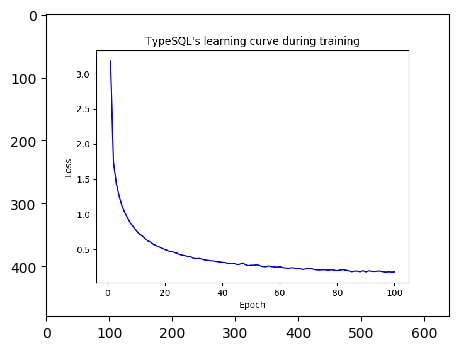

Model:  100d_bert_max-pool_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

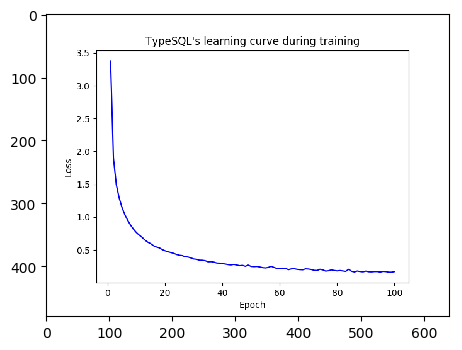

Model:  100d_bert_max-pool_types_single_kg


<Figure size 432x288 with 0 Axes>

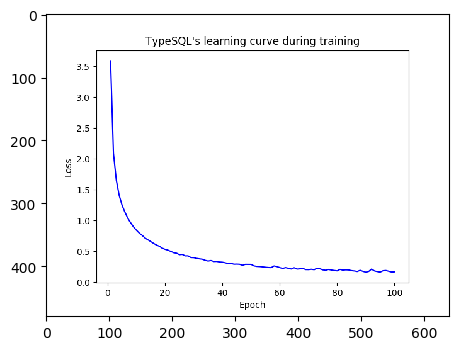

Model:  100d_pos_types_single_kg


<Figure size 432x288 with 0 Axes>

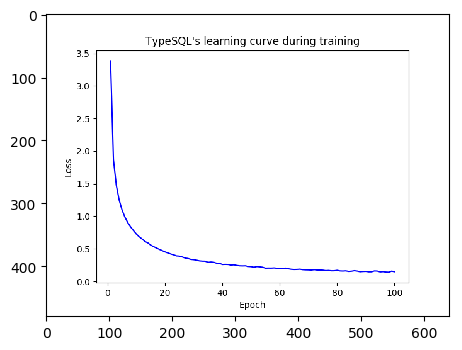

Model:  100d_types_homogeneous_kg


<Figure size 432x288 with 0 Axes>

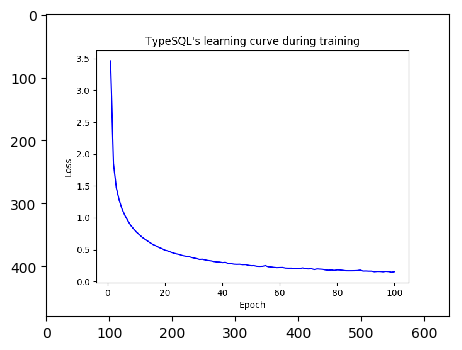

Model:  100d_types_single_kg


<Figure size 432x288 with 0 Axes>

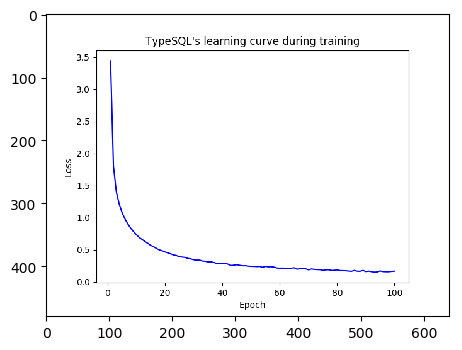

In [17]:
for i in range(len(filenames)):
    show_plots('loss', i)